<a href="https://colab.research.google.com/github/renatamontanhana/KNN_Avaliacao_Saude_Ortopedica_Pacientes/blob/main/Na_Pr%C3%A1tica_KNN_Avalia%C3%A7%C3%A3o_Ortop%C3%A9dica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> KNN: Avaliação de Condições de Saúde Ortopédica de Pacientes</font>
https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients


https://www.kaggle.com/jamiemorales/knn-biomech-patients-condition

![alt text](https://img.myloview.com.br/fotomurais/3d-mostrou-uma-ilustracao-medicamente-precisa-da-coluna-vertebral-humana-400-102492167.jpg)

#1° Problema de Negócio
Prever as condições Ortopédicas: Precisamos classificar os pacientes em uma das três categorias:
* Normais (100 pacientes)
* Hérnia de disco (60 pacientes)  
* Espondilolistese (150 pacientes). Distúrbio da coluna em que um osso (vértebra) desliza para frente sobre o osso abaixo dele.
Os fatores de risco de espondilolistese incluem esportes que exercem pressão sobre os ossos na parte inferior das costas, como ginástica e futebol.

Cada paciente é representado no conjunto de dados por **seis atributos biomecânicos** derivados da forma e orientação da pelve e da coluna lombar.

**Atributos** (variáveis de entrada)

1. incidência pélvica
2. inclinação pélvica
3. ângulo lordose lombar
4.inclinação sacral
5. raio pélvico
6. grau de espondilolistese

In [1]:
# Set-up libraries
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#2° Análise Exploratória dos Dados

In [2]:
# Read-in data
df = pd.read_csv('/content/column_3C_weka (1).csv')

In [3]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
# Look at some records
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [5]:
# Check for missing values
df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
# Check for duplicated
df.duplicated().sum()

0

In [ ]:
# Look at breakdown of label
df['class'].value_counts()
sns.countplot(df['class'])

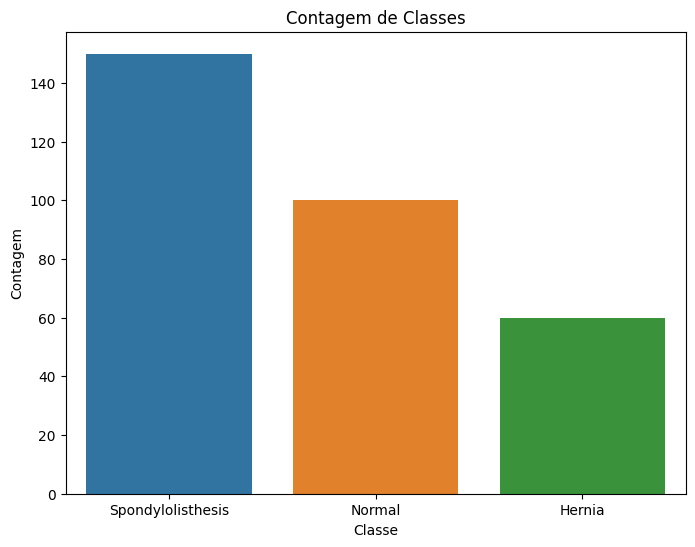

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a contagem das categorias
class_counts = df['class'].value_counts()

# Plotar um gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Contagem de Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

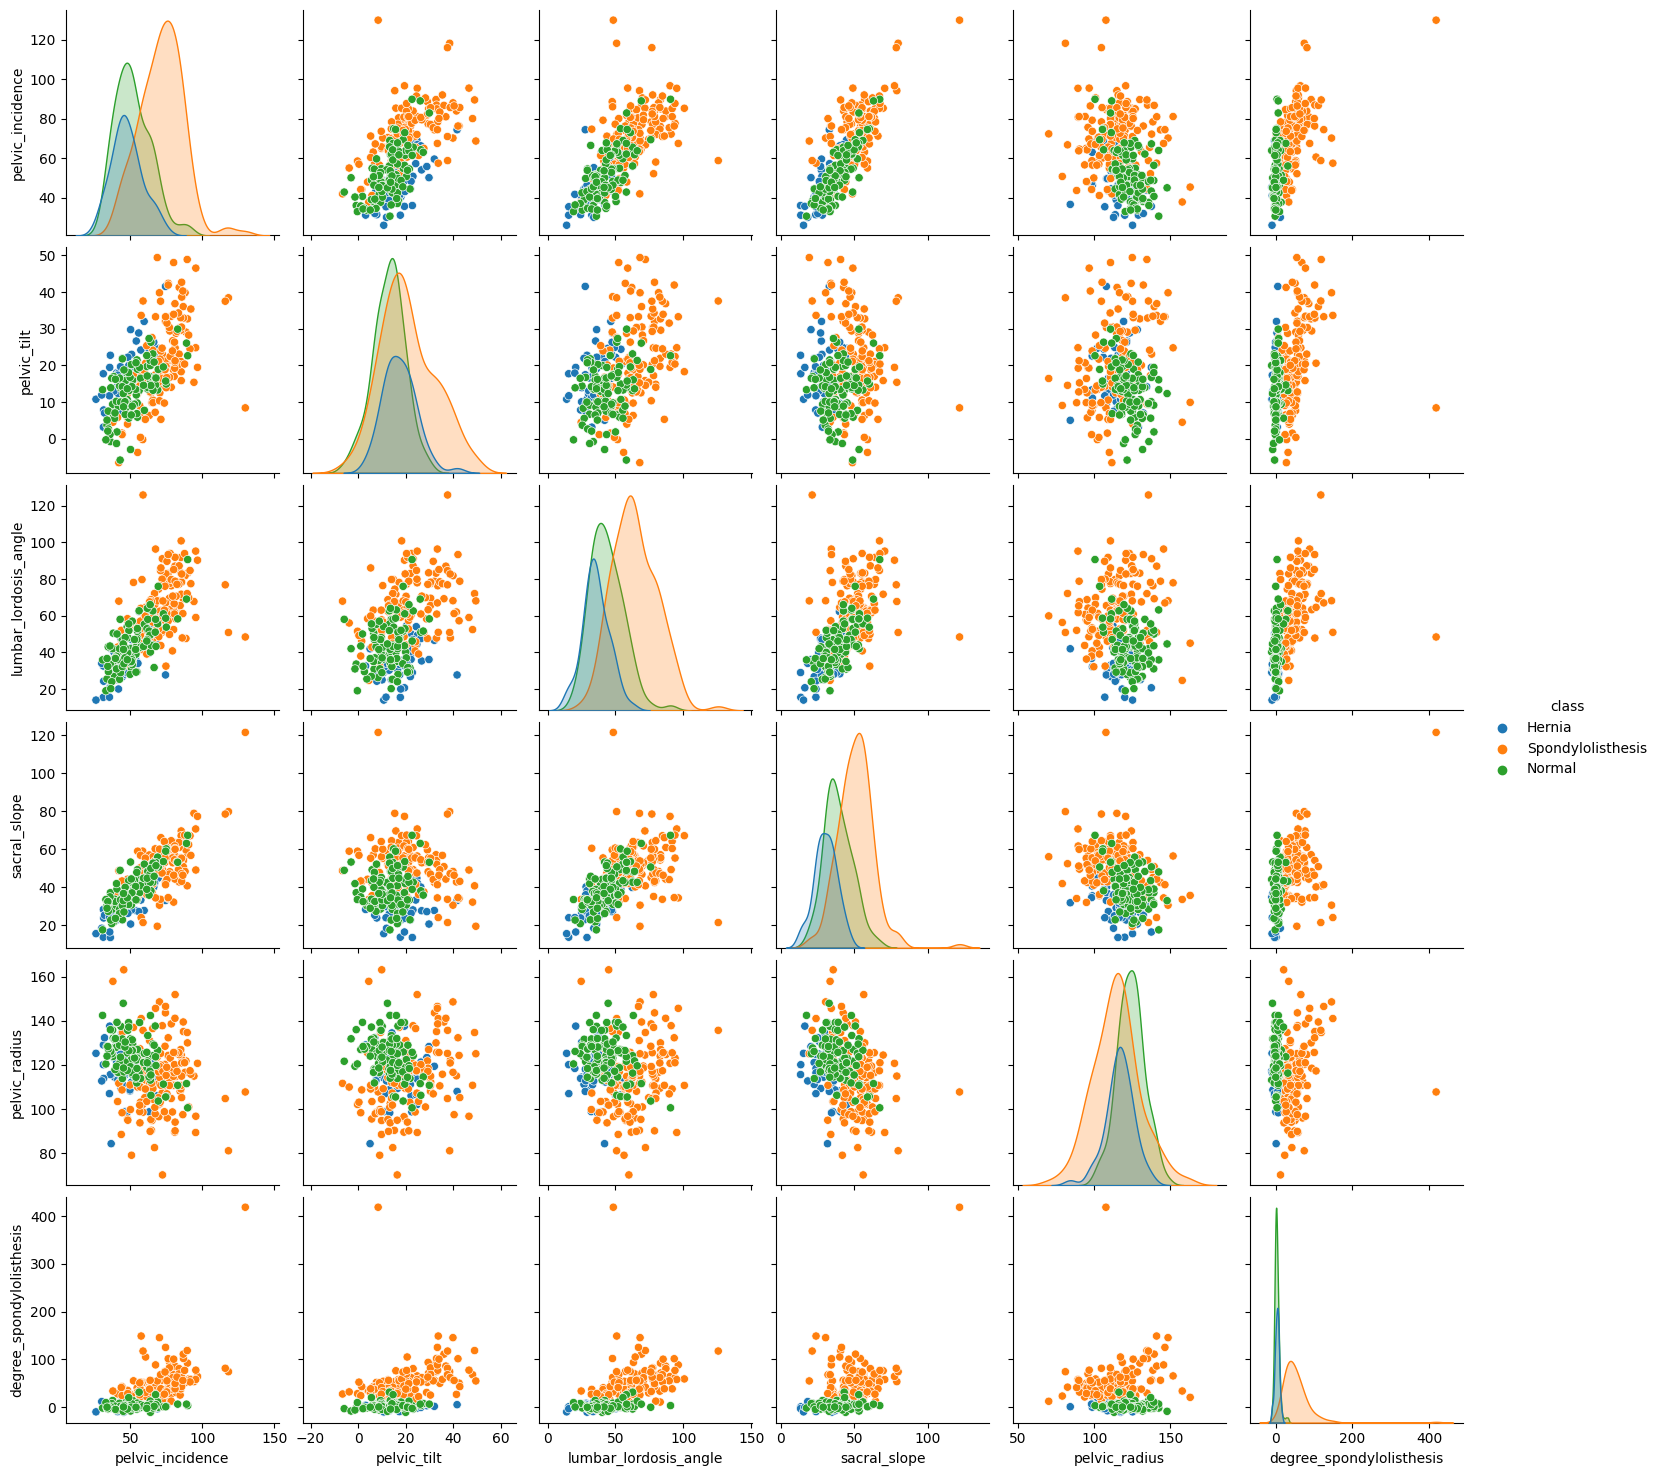

In [8]:
# Explore data visually with multple scatter plots
sns.pairplot(df, hue='class')

In [11]:
# Summarise
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#3° Pré-Processamento dos Dados

##### Separação das variáveis de Entrada(variáveis explicativas) e de Saída (Target)

In [12]:
X = df.drop('class', axis=1)
y = df['class']

##### Redimensionamento dos dados: Padroniza ou Normaliza

In [13]:
#Normalização
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

#Padronizado
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)


##### Separação em Dados de Treino e Dados de Teste

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

#4° Máquina Preditiva

In [15]:
# Build model and train data
classifier = KNeighborsClassifier(n_neighbors=3)
knn = classifier.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [16]:
# Apply model to validation data
y_predict = knn.predict(X_val)

In [17]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Actual: ': y_val,
                     'Prediction: ': y_predict})
actual_vs_predict.head(3)

,Actual:,Prediction:
279,Normal,Normal
102,Spondylolisthesis,Spondylolisthesis
171,Spondylolisthesis,Normal


#5° Avaliação da Máquina Preditiva

In [18]:
# Evaluate model

print('Accuracy: \n', accuracy_score(y_val, y_predict))
#Baseline = 85,48%
#normalizado = 74%
#Padronizado = 82,25%

Accuracy: 
 0.8548387096774194


In [19]:
print('Classification metrics: \n', classification_report(y_val, y_predict))

Classification metrics: 
                    precision    recall  f1-score   support

           Hernia       0.50      0.57      0.53         7
           Normal       0.80      0.76      0.78        21
Spondylolisthesis       0.97      0.97      0.97        34

         accuracy                           0.85        62
        macro avg       0.76      0.77      0.76        62
     weighted avg       0.86      0.85      0.86        62



In [20]:
print('Confusion_matrix: \n', confusion_matrix(y_val, y_predict))

Confusion_matrix: 
 [[ 4  3  0]
 [ 4 16  1]
 [ 0  1 33]]


# Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/c4wDGK9eUyc" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')